# NetworkX: Network Analysis in Python
----

[NetworkX](https://networkx.github.io/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g., text, images, XML records)
- Edges can hold arbitrary data (e.g., weights, time-series)

## Let's install necessary libraries

In [1]:
#!pip install networkx
#for graph plottinh
# !pip install matplotlib

# need graphviz on your machine
#!sudo apt-get install graphviz libgraphviz-dev graphviz-dev pkg-config
#!brew install graphviz . You may need to do python3 -m pip install --install-option="--include-path=/usr/local/include/" --install-option="--library-path=/usr/local/lib/" pygraphviz
#!pip install pygraphviz

# I used: conda install -c conda-forge pygraphviz

In [2]:
import networkx as nx
print(nx.__version__)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2.8.4


With this version of networkx (2.8.4) I have to use different methods (e.g. instead of draw, I used draw_networkx)

### Some functions to plot graphs

In [3]:
from networkx.drawing.nx_agraph import graphviz_layout

def plot_graph(G):
    nx.draw_networkx(G, with_labels = True)  
    plt.show()
    
def plot_graph_with_weights(G):
    pos = nx.planar_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def plot_tree(tree):
    pos = graphviz_layout(tree, prog='dot')
    nx.draw_networkx(tree, pos, with_labels=True)
    plt.show()
    
def plot_graph_and_highlight_dijistra(G, path):
    pos = graphviz_layout(G)
    nx.draw_networkx(G, pos, with_labels = True)

    nx.draw_networkx_nodes(G, pos, nodelist=path,node_color='r')
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=4)
    plt.show()

---

### Breadth First Search (BFS)

With Networkx it is easy to perform  graph search. Let us start with __BFS__. 

We will use a __Petersen__ graph as an example, a graph with 10 nodes and 15 edges.

Networkx offers several __methods__ to perform BFS. Observe that in the method definition, the arguments in square brackets [ ]  are optional.

- bfs_edges(G, source, [reverse, depth_limit]):  returns an iterator over edges in a breadth-first-search starting at source, until depth_limit
- bfs_tree(G, source, [reverse, depth_limit]): returns an oriented tree constructed from of a breadth-first-search starting at source
- bfs_predecessors(G, source, [depth_limit]): returns an iterator of predecessors in breadth-first-search from source
- bfs_successors(G, source, [depth_limit]): returns an iterator of successors in breadth-first-search from source         

---

### Depth First Search (DFS)


As for BFS,  Networkx offers several __methods__ to perform DFS. Observe that,as previously explained, in the method definition, the arguments in square brackets [ ]  are optional.
<ul>
  <li> dfs_edges(G, source, [reverse, depth_limit]):  returns an iterator over edges in a depth-first-search starting at source, until max_depth </li>
<li>dfs_tree(G, source, [reverse, depth_limit]): returns an oriented tree constructed from of a depth-first-search starting at source(</li>
<li>dfs_predecessors(G, source, [depth_limit]): returns an iterator of predecessors in depth-first-search from source</li>
    <li>dfs_successors(G, source, [depth_limit]): returns an iterator of successors in depth-first-search from source </li>    
    
</ul>
Let us now observe the difference between BFS and DFS
        

----
### Shortest path with Dijkstra algorithm

Let us now move to the Dijkstra algorithm to find the shortest path between two points.


In [4]:
from random import random, choice
from networkx.utils import pairwise

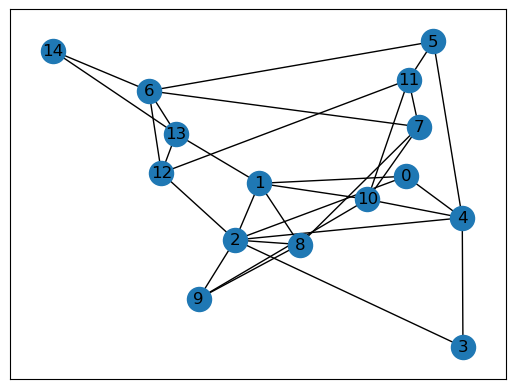

[0, 2, 3]


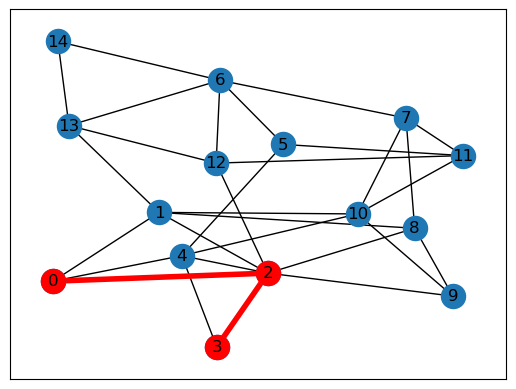

In [5]:
G = nx.Graph()

n_nodes = 15

# Generate nodes from 0 to n_nodes-1
nodes = np.arange(n_nodes)
G.add_nodes_from(nodes)

# Build a path from nodes[0] to nodes[-1] to be sure it exists
for p1, p2 in pairwise(nodes):
    G.add_edge(p1, p2, weight=np.linalg.norm(p1-p2))

    
# Add other random edges
new_edges = 25
for _ in range(new_edges):
    p1, p2 = choice(nodes), choice(nodes)
    if p1 != nodes[0] and p2!= nodes[-1]:#avoid direct link
        G.add_edge(p1, p2, weight=np.linalg.norm(p1-p2))
    
    
plot_graph(G)


# Compute Dijistra path
path =  nx.dijkstra_path(G, nodes[0], nodes[3])
print(path)
plot_graph_and_highlight_dijistra(G, path)

---
### Exercise: Strongly Connected Components
The goal of this exercise is to implement the following algorithm to compute the strongly connected components of a directed graph $G$. [See here](https://www.hackerearth.com/practice/algorithms/graphs/strongly-connected-components/tutorial/). 

In a directed graph a component is strongly connected if there is a directed path from any vertex to every other vertex of the component. The problem asks to is to partition the graph into maximal strongly connected components.

NetworkX provides a method to compute the strongly connected components of a graph [here](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.strongly_connected_components.html#networkx.algorithms.components.strongly_connected_components). 

Your goal is to implement the Kosaraju's Linear time algorithm to find Strongly Connected Component. 
The algorithm is described [here](https://www.hackerearth.com/practice/algorithms/graphs/strongly-connected-components/tutorial).

It works in three steps. 

- Do a DFS on the original graph, keeping track of the DFS finish times of each node. This can be done with a stack, when some  finishes put the source vertex on the stack. This way node with highest finishing time will be on top of the stack.
- Reverse the original graph, i.e., if there is an edge $(u,v)$ in the original graph, add the edge $(v,u)$ in the reversed one.
-  Do DFS on the reversed graph, with the source vertex as the vertex on top of the stack. When DFS finishes, all nodes visited will form one Strongly Connected Component. If any more nodes remain unvisited, this means there are more Strongly Connected Component's, so pop vertices from top of the stack until a valid unvisited node is found. This will have the highest finishing time of all currently unvisited nodes.

Take a look at [DFS traversal documentation](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html#module-networkx.algorithms.traversal.depth_first_search).
Note that the finishing time of a node can be inferred from its position in the DFS tree. 

In [6]:
def stronglyConnected(G):
    stack = list(nx.dfs_postorder_nodes(G))
    visited = set()
    scc = []
    reversedGraph = G.reverse()

    while len(stack) != 0:
        t = []
        source = stack.pop()
        nodes = list(nx.dfs_preorder_nodes(reversedGraph, source))
        for item in nodes:
            if item not in visited:
                visited.add(item)
                t.append(item)
        if len(t)!= 0:
            scc.append(set(t))
    return scc

In [7]:
# Test 1: Small graph
G1 = nx.DiGraph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
test1 = stronglyConnected(G1)  # Expected output: [{1, 2, 3}]
print(F"Test 1 - Small graph: {test1}")

for node in test1:
        assert True == (node in list(nx.strongly_connected_components(G1))), "Fail!"

# Test 2: Disconnected graph
G2 = nx.DiGraph()
G2.add_edges_from([(1, 2), (2, 3), (4, 5)])
test2 = stronglyConnected(G2)  # Expected output: [{1, 2, 3}, {4, 5}]
print(f"Test 2 - Disconnected graph: {test2}")

for node in test2:
        assert True == (node in list(nx.strongly_connected_components(G2))), "Fail!"

# Test 3: Graph with multiple strongly connected components
G3 = nx.DiGraph()
G3.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4)])
test3 = stronglyConnected(G3) # Expected output: [{1, 2, 3}, {4, 5, 6}]
print(f"Test 3 - Graph with multiple strongly connected components: {test3}")

for node in test3:
        assert True == (node in list(nx.strongly_connected_components(G3))), "Fail!"

# Test 4: Empty graph
G4 = nx.DiGraph()
test4 = stronglyConnected(G4)  # Expected output: []
print(f"Test 4 - Empty graph: {test4}")

for node in test4:
        assert True == (node in list(nx.strongly_connected_components(G4))), "Fail!"

# Test 5: Graph with a single node
G5 = nx.DiGraph()
G5.add_node(1)
test5 = stronglyConnected(G5)  # Expected output: [{1}]
print(f"Test 5 - Graph with a single node: {test5}")

for node in test5:
        assert True == (node in list(nx.strongly_connected_components(G5))), "Fail!"

# Test 6: Larger graph
G6 = nx.DiGraph()
G6.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (2, 4), (4, 5), (5, 6), (6, 4), (6, 7)])
test6 = stronglyConnected(G6)  # Expected output: [{0, 1, 2, 3}, {4, 5, 6}, {7}]
print(F"Test 6 - Larger graph: {test6}")

for node in test6:
        assert True == (node in list(nx.strongly_connected_components(G6))), "Fail!"

Test 1 - Small graph: [{1, 2, 3}]
Test 2 - Disconnected graph: [{4}, {5}, {1}, {2}, {3}]
Test 3 - Graph with multiple strongly connected components: [{4, 5, 6}, {1, 2, 3}]
Test 4 - Empty graph: []
Test 5 - Graph with a single node: [{1}]
Test 6 - Larger graph: [{0, 1, 2, 3}, {4, 5, 6}, {7}]


## Let's visualize the graphs

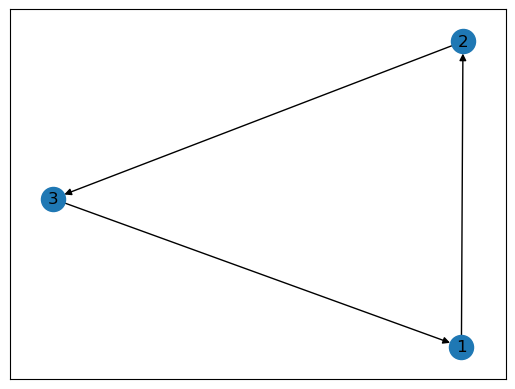

In [8]:
# Test 1
plot_graph(G1)

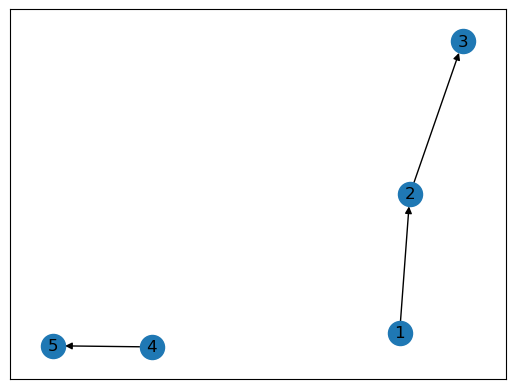

In [9]:
# Test 2
plot_graph(G2)

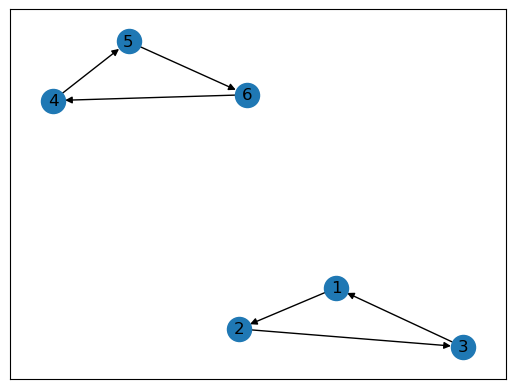

In [10]:
# Test 3
plot_graph(G3)

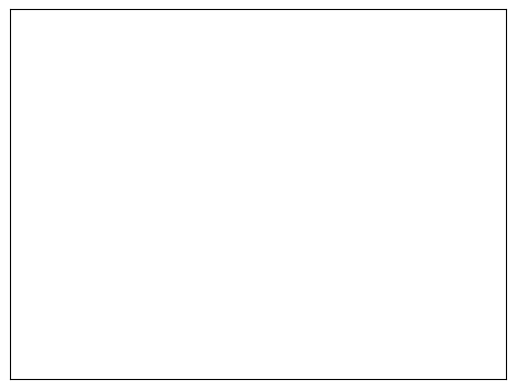

In [11]:
# Test 4
plot_graph(G4)

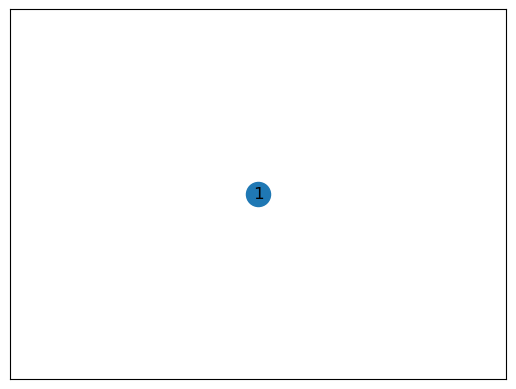

In [12]:
# Test 5
plot_graph(G5)

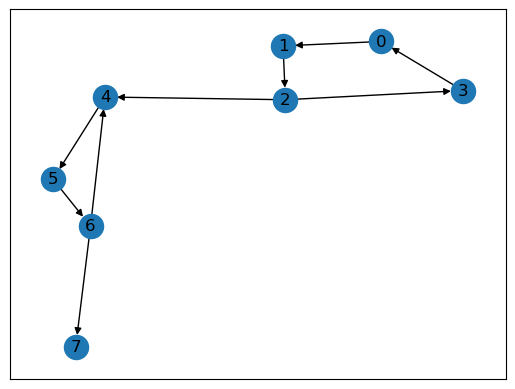

In [13]:
# Test 6
plot_graph(G6)